# Electric Vehicle Energy Dataset (eVED) Analysis

This notebook performs a comprehensive analysis of electric vehicle energy consumption data from the eVED dataset. The analysis follows these main steps:

## 1. Data Collection and Integration
- Read multiple CSV files containing electric vehicle telemetry data
- Filtered data for three specific vehicles (IDs: 10, 455, 541)
- Consolidated the data into a single dataset

## 2. Data Cleaning and Preprocessing
- Removed columns with more than 90% missing values
- Corrected data types and handled anomalies (e.g., speed limit ranges)
- Renamed columns for consistency and fixed spelling errors
- Removed unnecessary columns that wouldn't contribute to analysis

## 3. Feature Engineering
- **Temporal Features**: Created datetime objects and cyclical representations of time
- **Spatial Features**: Calculated distance traveled, elevation changes, and slope
- **Energy Features**: Computed power consumption, energy deltas, and cumulative energy use
- **Dynamic Features**: Derived acceleration from speed changes

## 4. Data Transformation
- Downsampled high-frequency data to 1-second intervals for consistent analysis
- Applied interpolation to handle missing values within vehicle trips
- Enforced physical constraints (e.g., battery SOC between 0-100%)

## 5. Exploratory Analysis
- Generated descriptive statistics for each vehicle and trip
- Created visualizations showing distributions of key variables
- Analyzed temporal patterns (monthly and weekly usage patterns)
- Compared energy consumption across different vehicles and conditions

## 6. Data Export
- Saved processed data as both combined and vehicle-specific datasets for further analysis

The notebook provides a foundation for understanding energy consumption patterns in electric vehicles and identifying factors that influence efficiency.

# Reading Data

In this section, we will read multiple CSV files from a specified directory, filter the data based on specific vehicle IDs, and concatenate the filtered data into a single dataframe.


In [1]:
import pandas as pd
import os
import warnings

# Suppress DtypeWarning messages
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# Define the path to the directory containing the CSV files
directory_path = r'C:\Users\mredh\Documents\Projet FEVC\eVED'

# List to store the filtered dataframes
extracted_dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Filter the dataframe for VehId 10, 455, and 541
        extracted_df = df[df['VehId'].isin([10, 455, 541])]
        # Append the filtered dataframe to the list
        extracted_dfs.append(extracted_df)

# Concatenate all filtered dataframes into a single dataframe
extracted_df = pd.concat(extracted_dfs, ignore_index=True)


In [2]:
output_csv_path = r'C:\Users\mredh\Documents\Projet FEVC\eVED\extracted.csv'

# Save the concatenated dataframe to a CSV file
extracted_df.to_csv(output_csv_path, index=False)

# Confirm the file has been saved
print(f"Extracted data has been saved to {output_csv_path}")

Extracted data has been saved to C:\Users\mredh\Documents\Projet FEVC\eVED\extracted.csv



# First Look of the Data

In this section, we will take an initial look at the data to understand its structure and contents. This includes examining the columns, data types, and a few sample rows from the dataframe.


In [3]:
# Display the data types of each column in the dataframe
extracted_df.dtypes

DayNum                              float64
VehId                               float64
Trip                                float64
Timestamp(ms)                       float64
Latitude[deg]                       float64
Longitude[deg]                      float64
Vehicle Speed[km/h]                 float64
MAF[g/sec]                          float64
Engine RPM[RPM]                     float64
Absolute Load[%]                    float64
OAT[DegC]                           float64
Fuel Rate[L/hr]                     float64
Air Conditioning Power[kW]          float64
Air Conditioning Power[Watts]       float64
Heater Power[Watts]                 float64
HV Battery Current[A]               float64
HV Battery SOC[%]                   float64
HV Battery Voltage[V]               float64
Short Term Fuel Trim Bank 1[%]      float64
Short Term Fuel Trim Bank 2[%]      float64
Long Term Fuel Trim Bank 1[%]       float64
Long Term Fuel Trim Bank 2[%]       float64
Elevation Raw[m]                

In [4]:
# Calculate the percentage of missing values for each column in the dataframe
missing_percentage = extracted_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage

DayNum                                0.000000
VehId                                 0.000000
Trip                                  0.000000
Timestamp(ms)                         0.000000
Latitude[deg]                         0.000000
Longitude[deg]                        0.000000
Vehicle Speed[km/h]                   0.000000
MAF[g/sec]                          100.000000
Engine RPM[RPM]                     100.000000
Absolute Load[%]                    100.000000
OAT[DegC]                             0.000000
Fuel Rate[L/hr]                     100.000000
Air Conditioning Power[kW]          100.000000
Air Conditioning Power[Watts]         0.000000
Heater Power[Watts]                   0.000000
HV Battery Current[A]                 0.000000
HV Battery SOC[%]                     0.000000
HV Battery Voltage[V]                 0.000000
Short Term Fuel Trim Bank 1[%]      100.000000
Short Term Fuel Trim Bank 2[%]      100.000000
Long Term Fuel Trim Bank 1[%]       100.000000
Long Term Fue

In [5]:
# Display the first 20 rows of the dataframe
extracted_df.head(20)

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Matchted Latitude[deg],Matched Longitude[deg],Match Type,Class of Speed Limit,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Focus Points,Focus Points;
0,1.719774,10.0,1558.0,0.0,42.277066,-83.763404,53.590000,NaN,NaN,NaN,...,42.276966,-83.763366,0,0.0,48,48.0,NaN,NaN,NaN,NaN
1,1.719774,10.0,1558.0,200.0,42.277066,-83.763404,51.980000,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
2,1.719774,10.0,1558.0,1200.0,42.277066,-83.763404,50.369999,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
3,1.719774,10.0,1558.0,1500.0,42.277066,-83.763404,50.369999,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
4,1.719774,10.0,1558.0,2300.0,42.277066,-83.763404,49.799999,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
5,1.719774,10.0,1558.0,3300.0,42.277066,-83.763404,51.570000,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
6,1.719774,10.0,1558.0,4400.0,42.277066,-83.763404,52.939999,NaN,NaN,NaN,...,42.276966,-83.763366,1,0.0,48,48.0,NaN,NaN,NaN,NaN
7,1.719774,10.0,1558.0,5000.0,42.277254,-83.762512,52.939999,NaN,NaN,NaN,...,42.277148,-83.762472,0,0.0,48,48.0,NaN,NaN,NaN,NaN
8,1.719774,10.0,1558.0,5400.0,42.277254,-83.762512,54.299999,NaN,NaN,NaN,...,42.277148,-83.762472,1,0.0,48,48.0,NaN,NaN,NaN,NaN
9,1.719774,10.0,1558.0,6000.0,42.277254,-83.762512,54.299999,NaN,NaN,NaN,...,42.277148,-83.762472,1,0.0,48,48.0,NaN,NaN,NaN,NaN


# Data Cleaning

In this section, we will remove columns with more than 90% missing data and continue to explore the remaining data for further insights.


In [6]:
# Identify columns with more than 90% missing data
columns_to_drop = missing_percentage[missing_percentage > 90].index

# Drop the identified columns from the dataframe
cleaned_df = extracted_df.drop(columns=columns_to_drop)

# Display the remaining columns
cleaned_df.dtypes

DayNum                              float64
VehId                               float64
Trip                                float64
Timestamp(ms)                       float64
Latitude[deg]                       float64
Longitude[deg]                      float64
Vehicle Speed[km/h]                 float64
OAT[DegC]                           float64
Air Conditioning Power[Watts]       float64
Heater Power[Watts]                 float64
HV Battery Current[A]               float64
HV Battery SOC[%]                   float64
HV Battery Voltage[V]               float64
Elevation Raw[m]                    float64
Elevation Smoothed[m]               float64
Gradient                            float64
Energy_Consumption                  float64
Matchted Latitude[deg]              float64
Matched Longitude[deg]              float64
Match Type                            int64
Class of Speed Limit                float64
Speed Limit[km/h]                    object
Speed Limit with Direction[km/h]

#converting column to a proper type

In [7]:
def convert_speed_limit(value):
    try:
        # Try to directly convert the value to float
        return float(value)
    except ValueError:
        # If the value contains a range, e.g., "48-40", split and average it.
        if '-' in value:
            try:
                lower, upper = value.split('-')
                lower = float(lower.strip())
                upper = float(upper.strip())
                return (lower + upper) / 2
            except Exception:
                return np.nan  # If conversion fails, return NaN
        else:
            return np.nan

# Apply the conversion function to the column
cleaned_df['Speed Limit[km/h]'] = cleaned_df['Speed Limit[km/h]'].apply(convert_speed_limit)

In [8]:
# Calculate the percentage of missing values for each column in the cleaned dataframe
missing_percentage_cleaned = cleaned_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage_cleaned

DayNum                              0.000000
VehId                               0.000000
Trip                                0.000000
Timestamp(ms)                       0.000000
Latitude[deg]                       0.000000
Longitude[deg]                      0.000000
Vehicle Speed[km/h]                 0.000000
OAT[DegC]                           0.000000
Air Conditioning Power[Watts]       0.000000
Heater Power[Watts]                 0.000000
HV Battery Current[A]               0.000000
HV Battery SOC[%]                   0.000000
HV Battery Voltage[V]               0.000000
Elevation Raw[m]                    0.000000
Elevation Smoothed[m]               0.000000
Gradient                            1.549628
Energy_Consumption                  0.000000
Matchted Latitude[deg]              0.000000
Matched Longitude[deg]              0.000000
Match Type                          0.000000
Class of Speed Limit                1.389647
Speed Limit[km/h]                   1.389647
Speed Limi

# Removing Unnecessary Columns 
In this section, we will remove the unnecessary columns `Speed Limit with Direction[km/h]`, `Match Type`, `Gradient`, `Latitude[deg]`, and `Longitude[deg]`. Additionally, we will correct the spelling of the column `Matchted Latitude[deg]` to `Matched Latitude[deg]`.


In [9]:
# Drop the specified columns from the cleaned dataframe
columns_to_drop = ['Speed Limit with Direction[km/h]', 'Match Type', 'Gradient', 'Latitude[deg]', 'Longitude[deg]', 'Class of Speed Limit', 'Speed Limit[km/h]']
cleaned_df = cleaned_df.drop(columns=columns_to_drop)

# Rename the column with the correct spelling
cleaned_df = cleaned_df.rename(columns={'Matchted Latitude[deg]': 'Matched Latitude[deg]'})

# Display the updated dataframe columns
cleaned_df.dtypes

DayNum                           float64
VehId                            float64
Trip                             float64
Timestamp(ms)                    float64
Vehicle Speed[km/h]              float64
OAT[DegC]                        float64
Air Conditioning Power[Watts]    float64
Heater Power[Watts]              float64
HV Battery Current[A]            float64
HV Battery SOC[%]                float64
HV Battery Voltage[V]            float64
Elevation Raw[m]                 float64
Elevation Smoothed[m]            float64
Energy_Consumption               float64
Matched Latitude[deg]            float64
Matched Longitude[deg]           float64
dtype: object

In [10]:
# Calculate the percentage of missing values for each column in the cleaned dataframe
missing_percentage_cleaned = cleaned_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage_cleaned

DayNum                           0.0
VehId                            0.0
Trip                             0.0
Timestamp(ms)                    0.0
Vehicle Speed[km/h]              0.0
OAT[DegC]                        0.0
Air Conditioning Power[Watts]    0.0
Heater Power[Watts]              0.0
HV Battery Current[A]            0.0
HV Battery SOC[%]                0.0
HV Battery Voltage[V]            0.0
Elevation Raw[m]                 0.0
Elevation Smoothed[m]            0.0
Energy_Consumption               0.0
Matched Latitude[deg]            0.0
Matched Longitude[deg]           0.0
dtype: float64

# Extracting Temporal Features

In this section, we will extract temporal features from the `Timestamp(ms)` column. This includes converting the timestamp to datetime format and extracting features such as hour, day of the week, and month.





In [11]:
from datetime import datetime, timedelta

# Assuming your base date is November 1, 2017
base_date = datetime(2017, 11, 1)

def convert_to_datetime(daynum, ts_ms):
    # Calculate the datetime: subtract 1 from daynum since DayNum 1 is the base date.
    day_offset = timedelta(days=daynum - 1)
    ms_offset = timedelta(milliseconds=ts_ms)
    return base_date + day_offset + ms_offset

# Apply the conversion to your DataFrame
cleaned_df['Datetime'] = cleaned_df.apply(lambda row: convert_to_datetime(row['DayNum'], row['Timestamp(ms)']), axis=1)

In [12]:
cleaned_df

,DayNum,VehId,Trip,Timestamp(ms),Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Elevation Raw[m],Elevation Smoothed[m],Energy_Consumption,Matched Latitude[deg],Matched Longitude[deg],Datetime
0,1.719774,10.0,1558.0,0.0,53.590000,5.0,0.0,2250.0,-21.5,96.341469,386.0,265.259003,265.259003,0.002305,42.276966,-83.763366,2017-11-01 17:16:28.456800
1,1.719774,10.0,1558.0,200.0,51.980000,5.0,0.0,2250.0,-21.5,96.341469,386.0,265.259003,265.259003,0.002305,42.276966,-83.763366,2017-11-01 17:16:28.656800
2,1.719774,10.0,1558.0,1200.0,50.369999,5.0,0.0,2250.0,-21.5,96.341469,386.0,265.259003,265.259003,0.002305,42.276966,-83.763366,2017-11-01 17:16:29.656800
3,1.719774,10.0,1558.0,1500.0,50.369999,5.0,0.0,2250.0,23.5,96.341469,390.5,265.259003,265.259003,-0.002549,42.276966,-83.763366,2017-11-01 17:16:29.956800
4,1.719774,10.0,1558.0,2300.0,49.799999,5.0,0.0,2250.0,23.5,96.341469,390.5,265.259003,265.259003,-0.002549,42.276966,-83.763366,2017-11-01 17:16:30.756800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476303,374.499878,10.0,3271.0,418400.0,31.719999,4.5,400.0,500.0,21.5,96.341469,390.5,276.137177,276.137177,-0.002332,42.302581,-83.704804,2018-11-09 12:06:47.838378
476304,374.499878,10.0,3271.0,419200.0,33.840000,4.5,400.0,500.0,21.5,96.341469,390.5,276.137177,276.137177,-0.002332,42.302581,-83.704804,2018-11-09 12:06:48.638378
476305,374.499878,10.0,3271.0,419500.0,33.840000,4.5,400.0,500.0,-73.0,96.341469,390.5,276.137177,276.137177,0.007918,42.302581,-83.704804,2018-11-09 12:06:48.938378
476306,374.499878,10.0,3271.0,420300.0,40.040001,4.5,400.0,500.0,-73.0,96.341469,379.5,276.137177,276.137177,0.007695,42.302581,-83.704804,2018-11-09 12:06:49.738378


In [13]:
import numpy as np
cleaned_df['day_of_year'] = pd.to_datetime(cleaned_df['Datetime']).dt.dayofyear

# Encode as sin and cos using 'result_df'
cleaned_df['dayofyear_sin'] = np.sin(2 * np.pi * cleaned_df['day_of_year'] / 365)
cleaned_df['dayofyear_cos'] = np.cos(2 * np.pi * cleaned_df['day_of_year'] / 365)
cleaned_df.dtypes

DayNum                                  float64
VehId                                   float64
Trip                                    float64
Timestamp(ms)                           float64
Vehicle Speed[km/h]                     float64
OAT[DegC]                               float64
Air Conditioning Power[Watts]           float64
Heater Power[Watts]                     float64
HV Battery Current[A]                   float64
HV Battery SOC[%]                       float64
HV Battery Voltage[V]                   float64
Elevation Raw[m]                        float64
Elevation Smoothed[m]                   float64
Energy_Consumption                      float64
Matched Latitude[deg]                   float64
Matched Longitude[deg]                  float64
Datetime                         datetime64[ns]
day_of_year                               int32
dayofyear_sin                           float64
dayofyear_cos                           float64
dtype: object

```markdown
# Extracting Spatial Features
Distance and slope
```


In [14]:

# Ensure the DataFrame is sorted by VehId, Trip, and Timestamp(ms)
cleaned_df = cleaned_df.sort_values(['VehId', 'Trip', 'Timestamp(ms)'])

# Calculate time differences in hours within each trip
cleaned_df['TimeDiff_hours'] = cleaned_df.groupby(['VehId', 'Trip'])['Timestamp(ms)'].diff() / (1000 * 3600)
negatives = cleaned_df[cleaned_df['TimeDiff_hours'] < 0]
if not negatives.empty:
    print(f"Found {len(negatives)} rows with negative time differences")
cleaned_df['TimeDiff_hours'] = cleaned_df['TimeDiff_hours'].clip(lower=0)

# Calculate distance for each interval using the trapezoidal rule
cleaned_df['Speed_avg'] = cleaned_df.groupby(['VehId', 'Trip'])['Vehicle Speed[km/h]'].transform(lambda x: (x + x.shift(-1)) / 2)
cleaned_df['Distance_km'] = cleaned_df['Speed_avg'] * cleaned_df['TimeDiff_hours']
cleaned_df['Distance_km'] = cleaned_df['Distance_km'].fillna(0)  # First row of each trip
cleaned_df['Distance_m'] = cleaned_df['Distance_km'] * 1000  # Convert to meters for slope calculation

# Calculate elevation difference
cleaned_df['Elevation_Diff_m'] = cleaned_df.groupby(['VehId', 'Trip'])['Elevation Smoothed[m]'].diff()

# Calculate slope in percentage and degrees
# Avoid division by zero by replacing zero distances with a small value (e.g., 0.001 m)
cleaned_df['Slope_%'] = (cleaned_df['Elevation_Diff_m'] / cleaned_df['Distance_m'].replace(0, 0.001)) * 100
cleaned_df['Slope_deg'] = np.arctan(cleaned_df['Elevation_Diff_m'] / cleaned_df['Distance_m'].replace(0, 0.001)) * (180 / np.pi)

# Handle NaN values (first row of each trip will be NaN due to diff())
cleaned_df['Slope_%'] = cleaned_df['Slope_%'].fillna(0)
cleaned_df['Slope_deg'] = cleaned_df['Slope_deg'].fillna(0)

# Summarize total distance and average slope per trip
trip_summary = cleaned_df.groupby(['VehId', 'Trip']).agg({
    'Distance_km': 'sum',
    'Slope_%': 'mean',
    'Slope_deg': 'mean'
}).reset_index()
trip_summary.columns = ['VehId', 'Trip', 'Total_Distance_km', 'Avg_Slope_%', 'Avg_Slope_deg']

# Merge summaries back into the original DataFrame (optional)
cleaned_df = cleaned_df.merge(trip_summary[['VehId', 'Trip', 'Total_Distance_km', 'Avg_Slope_%', 'Avg_Slope_deg']], 
                              on=['VehId', 'Trip'], how='left')

cleaned_df

,DayNum,VehId,Trip,Timestamp(ms),Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],...,TimeDiff_hours,Speed_avg,Distance_km,Distance_m,Elevation_Diff_m,Slope_%,Slope_deg,Total_Distance_km,Avg_Slope_%,Avg_Slope_deg
0,1.719774,10.0,1558.0,0.0,53.590000,5.0,0.0,2250.0,-21.5,96.341469,...,NaN,52.785000,0.000000,0.000000,NaN,0.000000,0.00000,0.888767,-54.157840,-3.355314
1,1.719774,10.0,1558.0,200.0,51.980000,5.0,0.0,2250.0,-21.5,96.341469,...,0.000056,51.174999,0.002843,2.843056,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314
2,1.719774,10.0,1558.0,1200.0,50.369999,5.0,0.0,2250.0,-21.5,96.341469,...,0.000278,50.369999,0.013992,13.991666,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314
3,1.719774,10.0,1558.0,1500.0,50.369999,5.0,0.0,2250.0,23.5,96.341469,...,0.000083,50.084999,0.004174,4.173750,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314
4,1.719774,10.0,1558.0,2300.0,49.799999,5.0,0.0,2250.0,23.5,96.341469,...,0.000222,50.684999,0.011263,11.263333,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476303,208.990283,541.0,1153.0,108800.0,66.449997,30.0,0.0,0.0,-13.5,59.024395,...,0.000056,66.424999,0.003690,3.690278,-0.031519,-0.854097,-0.48935,1.263614,9.070566,1.362915
476304,208.990283,541.0,1153.0,109600.0,66.400002,30.0,0.0,0.0,-13.5,59.024395,...,0.000222,66.400002,0.014756,14.755556,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915
476305,208.990283,541.0,1153.0,109800.0,66.400002,30.0,0.0,0.0,-14.0,59.024395,...,0.000056,66.360001,0.003687,3.686667,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915
476306,208.990283,541.0,1153.0,110700.0,66.320000,30.0,0.0,0.0,-14.0,59.024395,...,0.000250,66.320000,0.016580,16.580000,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915


In [15]:
# Ensure the DataFrame is sorted by VehId, Trip, and Timestamp(ms)
cleaned_df = cleaned_df.sort_values(['VehId', 'Trip', 'Timestamp(ms)'])

# Calculate the time difference in seconds within each trip
cleaned_df['TimeDiff_seconds'] = cleaned_df.groupby(['VehId', 'Trip'])['Timestamp(ms)'].diff() / 1000

# Calculate the speed difference in km/h within each trip
cleaned_df['SpeedDiff_kmh'] = cleaned_df.groupby(['VehId', 'Trip'])['Vehicle Speed[km/h]'].diff()

# Convert speed difference from km/h to m/s (1 km/h = 0.27778 m/s)
cleaned_df['SpeedDiff_ms'] = cleaned_df['SpeedDiff_kmh'] * 0.27778

# Calculate acceleration in m/s^2
cleaned_df['Acceleration_ms2'] = cleaned_df['SpeedDiff_ms'] / cleaned_df['TimeDiff_seconds']

# Handle NaN values (first row of each trip will be NaN due to diff())
cleaned_df['Acceleration_ms2'] = cleaned_df['Acceleration_ms2'].fillna(0)

# Display the updated dataframe with the new acceleration column
cleaned_df

,DayNum,VehId,Trip,Timestamp(ms),Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],...,Elevation_Diff_m,Slope_%,Slope_deg,Total_Distance_km,Avg_Slope_%,Avg_Slope_deg,TimeDiff_seconds,SpeedDiff_kmh,SpeedDiff_ms,Acceleration_ms2
0,1.719774,10.0,1558.0,0.0,53.590000,5.0,0.0,2250.0,-21.5,96.341469,...,NaN,0.000000,0.00000,0.888767,-54.157840,-3.355314,NaN,NaN,NaN,0.000000
1,1.719774,10.0,1558.0,200.0,51.980000,5.0,0.0,2250.0,-21.5,96.341469,...,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314,0.2,-1.610001,-0.447226,-2.236130
2,1.719774,10.0,1558.0,1200.0,50.369999,5.0,0.0,2250.0,-21.5,96.341469,...,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314,1.0,-1.610001,-0.447226,-0.447226
3,1.719774,10.0,1558.0,1500.0,50.369999,5.0,0.0,2250.0,23.5,96.341469,...,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314,0.3,0.000000,0.000000,0.000000
4,1.719774,10.0,1558.0,2300.0,49.799999,5.0,0.0,2250.0,23.5,96.341469,...,0.000000,0.000000,0.00000,0.888767,-54.157840,-3.355314,0.8,-0.570000,-0.158335,-0.197918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476303,208.990283,541.0,1153.0,108800.0,66.449997,30.0,0.0,0.0,-13.5,59.024395,...,-0.031519,-0.854097,-0.48935,1.263614,9.070566,1.362915,0.2,0.000000,0.000000,0.000000
476304,208.990283,541.0,1153.0,109600.0,66.400002,30.0,0.0,0.0,-13.5,59.024395,...,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915,0.8,-0.049995,-0.013888,-0.017360
476305,208.990283,541.0,1153.0,109800.0,66.400002,30.0,0.0,0.0,-14.0,59.024395,...,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915,0.2,0.000000,0.000000,0.000000
476306,208.990283,541.0,1153.0,110700.0,66.320000,30.0,0.0,0.0,-14.0,59.024395,...,0.000000,0.000000,0.00000,1.263614,9.070566,1.362915,0.9,-0.080002,-0.022223,-0.024692


In [16]:
# Drop the specified columns from the cleaned dataframe
columns_to_drop = ['TimeDiff_seconds', 'SpeedDiff_kmh', 'SpeedDiff_ms']
cleaned_df = cleaned_df.drop(columns=columns_to_drop)

# Display the updated dataframe columns
cleaned_df.dtypes

DayNum                                  float64
VehId                                   float64
Trip                                    float64
Timestamp(ms)                           float64
Vehicle Speed[km/h]                     float64
OAT[DegC]                               float64
Air Conditioning Power[Watts]           float64
Heater Power[Watts]                     float64
HV Battery Current[A]                   float64
HV Battery SOC[%]                       float64
HV Battery Voltage[V]                   float64
Elevation Raw[m]                        float64
Elevation Smoothed[m]                   float64
Energy_Consumption                      float64
Matched Latitude[deg]                   float64
Matched Longitude[deg]                  float64
Datetime                         datetime64[ns]
day_of_year                               int32
dayofyear_sin                           float64
dayofyear_cos                           float64
TimeDiff_hours                          

# Extracting Energetic Features

In this section, we will extract energetic features from the data. This includes calculating the energy consumption relevant parameters.


In [17]:
# Ensure data is sorted
cleaned_df = cleaned_df.sort_values(['VehId', 'Trip', 'Timestamp(ms)'])

# Calculate time differences in hours
cleaned_df['TimeDiff_hours'] = (cleaned_df.groupby(['VehId', 'Trip'])['Timestamp(ms)']
                                .diff() / (1000 * 3600)).clip(lower=0)

# Calculate instantaneous power in watts
cleaned_df['Power_W'] = cleaned_df['HV Battery Current[A]'] * cleaned_df['HV Battery Voltage[V]']

# Calculate average power between consecutive timestamps within each trip
cleaned_df['Power_avg_W'] = (cleaned_df.groupby(['VehId', 'Trip'])['Power_W']
                             .transform(lambda x: (x + x.shift(-1)) / 2))

# Calculate energy delta for each interval in kWh
cleaned_df['Energy_delta_kWh'] = (cleaned_df['Power_avg_W'] * cleaned_df['TimeDiff_hours']) / 1000

# Fill NaN values (e.g., last row of each trip) with 0
cleaned_df['Energy_delta_kWh'] = cleaned_df['Energy_delta_kWh'].fillna(0)

# Calculate total energy consumption per trip
total_energy_per_trip = (cleaned_df.groupby(['VehId', 'Trip'])['Energy_delta_kWh']
                         .sum().reset_index(name='Total_Energy_kWh'))

# Optional: Calculate cumulative energy within each trip
cleaned_df['Cumulative_Energy_kWh'] = (cleaned_df.groupby(['VehId', 'Trip'])['Energy_delta_kWh']
                                       .cumsum())

In [18]:
cleaned_df

,DayNum,VehId,Trip,Timestamp(ms),Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],...,Slope_%,Slope_deg,Total_Distance_km,Avg_Slope_%,Avg_Slope_deg,Acceleration_ms2,Power_W,Power_avg_W,Energy_delta_kWh,Cumulative_Energy_kWh
0,1.719774,10.0,1558.0,0.0,53.590000,5.0,0.0,2250.0,-21.5,96.341469,...,0.000000,0.00000,0.888767,-54.157840,-3.355314,0.000000,-8299.00,-8299.000,0.000000,0.000000
1,1.719774,10.0,1558.0,200.0,51.980000,5.0,0.0,2250.0,-21.5,96.341469,...,0.000000,0.00000,0.888767,-54.157840,-3.355314,-2.236130,-8299.00,-8299.000,-0.000461,-0.000461
2,1.719774,10.0,1558.0,1200.0,50.369999,5.0,0.0,2250.0,-21.5,96.341469,...,0.000000,0.00000,0.888767,-54.157840,-3.355314,-0.447226,-8299.00,438.875,0.000122,-0.000339
3,1.719774,10.0,1558.0,1500.0,50.369999,5.0,0.0,2250.0,23.5,96.341469,...,0.000000,0.00000,0.888767,-54.157840,-3.355314,0.000000,9176.75,9176.750,0.000765,0.000426
4,1.719774,10.0,1558.0,2300.0,49.799999,5.0,0.0,2250.0,23.5,96.341469,...,0.000000,0.00000,0.888767,-54.157840,-3.355314,-0.197918,9176.75,9176.750,0.002039,0.002465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476303,208.990283,541.0,1153.0,108800.0,66.449997,30.0,0.0,0.0,-13.5,59.024395,...,-0.854097,-0.48935,1.263614,9.070566,1.362915,0.000000,-5082.75,-5082.750,-0.000282,-0.155322
476304,208.990283,541.0,1153.0,109600.0,66.400002,30.0,0.0,0.0,-13.5,59.024395,...,0.000000,0.00000,1.263614,9.070566,1.362915,-0.017360,-5082.75,-5176.875,-0.001150,-0.156473
476305,208.990283,541.0,1153.0,109800.0,66.400002,30.0,0.0,0.0,-14.0,59.024395,...,0.000000,0.00000,1.263614,9.070566,1.362915,0.000000,-5271.00,-5271.000,-0.000293,-0.156766
476306,208.990283,541.0,1153.0,110700.0,66.320000,30.0,0.0,0.0,-14.0,59.024395,...,0.000000,0.00000,1.263614,9.070566,1.362915,-0.024692,-5271.00,-5082.750,-0.001271,-0.158036


# Downsampling to One Hertz

In this section, we will downsample the data to one hertz (1 Hz) frequency. This involves aggregating the data to one-second intervals and recalculating derived columns to ensure consistency.

the estimation of missing values is:
$$
y_2 = y_1 + (y_3 - y_1) \cdot \frac{t_2 - t_1}{t_3 - t_1}
$$





In [19]:
# Define aggregation dictionary
agg_dict = {
    'Vehicle Speed[km/h]': 'mean',
    'OAT[DegC]': 'mean',
    'Air Conditioning Power[Watts]': 'mean',
    'Heater Power[Watts]': 'mean',
    'HV Battery Current[A]': 'mean',
    'HV Battery SOC[%]': 'last',
    'HV Battery Voltage[V]': 'mean',
    'Elevation Raw[m]': 'mean',
    'Elevation Smoothed[m]': 'mean',
    'Matched Latitude[deg]': 'mean',
    'Matched Longitude[deg]': 'mean',
    'Distance_km': 'sum',
    'Distance_m': 'sum',
    'Slope_%': 'mean',
    'Slope_deg': 'mean',
    'Total_Distance_km': 'first',
    'Avg_Slope_%': 'first',
    'Avg_Slope_deg': 'first',
    'Power_W': 'mean',
    'Power_avg_W': 'mean',
    'Energy_delta_kWh': 'sum',
    'Cumulative_Energy_kWh': 'last',
    'Energy_Consumption': 'last',
    'Acceleration_ms2': 'mean',
}

# Downsample the data
downsampled_list = []
for (vehid, trip), group in cleaned_df.groupby(['VehId', 'Trip']):
    group = group.set_index('Datetime')
    resampled = group.resample('1s').agg(agg_dict)
    resampled['VehId'] = vehid
    resampled['Trip'] = trip
    downsampled_list.append(resampled)

downsampled_df = pd.concat(downsampled_list)
downsampled_df = downsampled_df.reset_index()

# Recalculate derived columns
downsampled_df['day_of_year'] = downsampled_df['Datetime'].dt.dayofyear
downsampled_df['dayofyear_sin'] = np.sin(2 * np.pi * downsampled_df['day_of_year'] / 365)
downsampled_df['dayofyear_cos'] = np.cos(2 * np.pi * downsampled_df['day_of_year'] / 365)

# Optional: Recalculate cumulative energy
downsampled_df['Cumulative_Energy_kWh'] = downsampled_df.groupby(['VehId', 'Trip'])['Energy_delta_kWh'].cumsum()

In [20]:
downsampled_df

,Datetime,Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Elevation Raw[m],Elevation Smoothed[m],...,Power_avg_W,Energy_delta_kWh,Cumulative_Energy_kWh,Energy_Consumption,Acceleration_ms2,VehId,Trip,day_of_year,dayofyear_sin,dayofyear_cos
0,2017-11-01 17:16:28,52.785000,5.0,0.0,2250.0,-21.50,96.341469,386.00,265.259003,265.259003,...,-8299.0000,-0.000461,-0.000461,0.002305,-1.118065,10.0,1558.0,305,-0.858764,0.512371
1,2017-11-01 17:16:29,50.369999,5.0,0.0,2250.0,1.00,96.341469,388.25,265.259003,265.259003,...,4807.8125,0.000887,0.000426,-0.002549,-0.223613,10.0,1558.0,305,-0.858764,0.512371
2,2017-11-01 17:16:30,49.799999,5.0,0.0,2250.0,23.50,96.341469,390.50,265.259003,265.259003,...,9176.7500,0.002039,0.002465,-0.002549,-0.197918,10.0,1558.0,305,-0.858764,0.512371
3,2017-11-01 17:16:31,51.570000,5.0,0.0,2250.0,23.50,96.341469,390.50,265.259003,264.870184,...,9176.7500,0.002549,0.005014,-0.002549,0.491671,10.0,1558.0,305,-0.858764,0.512371
4,2017-11-01 17:16:32,52.939999,5.0,0.0,2250.0,23.50,96.341469,390.50,265.259003,264.481366,...,9176.7500,0.002804,0.007818,-0.002549,0.345962,10.0,1558.0,305,-0.858764,0.512371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287751,2018-05-27 23:47:47,65.599998,30.0,0.0,0.0,-39.00,59.024395,375.00,283.191284,283.191284,...,-14625.0000,-0.000812,-0.148912,0.004063,0.000000,541.0,1153.0,147,0.573772,-0.819015
287752,2018-05-27 23:47:48,66.189995,30.0,0.0,0.0,-34.00,59.024395,375.50,283.138753,283.128247,...,-12304.8750,-0.004951,-0.153863,0.003294,0.060700,541.0,1153.0,147,0.573772,-0.819015
287753,2018-05-27 23:47:49,66.449997,30.0,0.0,0.0,-22.50,59.024395,376.50,283.033691,283.049451,...,-6777.0000,-0.001459,-0.155322,0.001412,0.072223,541.0,1153.0,147,0.573772,-0.819015
287754,2018-05-27 23:47:50,66.400002,30.0,0.0,0.0,-13.75,59.024395,376.50,283.033691,283.033691,...,-5223.9375,-0.001443,-0.156766,0.001464,-0.008680,541.0,1153.0,147,0.573772,-0.819015


In [21]:
# Define the path to save the downsampled data
downsampled_csv_path = r'C:\Users\mredh\Documents\Projet FEVC\eVED\downsampled_data.csv'

# Save the downsampled dataframe to a CSV file
downsampled_df.to_csv(downsampled_csv_path, index=False)

# Confirm the file has been saved
print(f"Downsampled data has been saved to {downsampled_csv_path}")

Downsampled data has been saved to C:\Users\mredh\Documents\Projet FEVC\eVED\downsampled_data.csv


In [22]:
# Calculate the percentage of missing values for each column in the downsampled dataframe
missing_percentage_downsampled = downsampled_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage_downsampled

Datetime                          0.000000
Vehicle Speed[km/h]              17.053684
OAT[DegC]                        17.053684
Air Conditioning Power[Watts]    17.053684
Heater Power[Watts]              17.053684
HV Battery Current[A]            17.053684
HV Battery SOC[%]                17.053684
HV Battery Voltage[V]            17.053684
Elevation Raw[m]                 17.053684
Elevation Smoothed[m]            17.053684
Matched Latitude[deg]            17.053684
Matched Longitude[deg]           17.053684
Distance_km                       0.000000
Distance_m                        0.000000
Slope_%                          17.053684
Slope_deg                        17.053684
Total_Distance_km                17.053684
Avg_Slope_%                      17.053684
Avg_Slope_deg                    17.053684
Power_W                          17.053684
Power_avg_W                      17.126315
Energy_delta_kWh                  0.000000
Cumulative_Energy_kWh             0.000000
Energy_Cons

In [23]:
downsampled_df.shape

(287756, 30)

In [24]:
downsampled_df.dtypes

Datetime                         datetime64[ns]
Vehicle Speed[km/h]                     float64
OAT[DegC]                               float64
Air Conditioning Power[Watts]           float64
Heater Power[Watts]                     float64
HV Battery Current[A]                   float64
HV Battery SOC[%]                       float64
HV Battery Voltage[V]                   float64
Elevation Raw[m]                        float64
Elevation Smoothed[m]                   float64
Matched Latitude[deg]                   float64
Matched Longitude[deg]                  float64
Distance_km                             float64
Distance_m                              float64
Slope_%                                 float64
Slope_deg                               float64
Total_Distance_km                       float64
Avg_Slope_%                             float64
Avg_Slope_deg                           float64
Power_W                                 float64
Power_avg_W                             

#Imputing missing values after downsampling


In [25]:
# Assuming your DataFrame is called 'downsampled_df'
# Define columns with missing values to impute (numerical columns with ~17% missing data)
impute_cols = [
    'Vehicle Speed[km/h]', 'OAT[DegC]', 'Air Conditioning Power[Watts]',
    'Heater Power[Watts]', 'HV Battery Current[A]', 'HV Battery SOC[%]',
    'HV Battery Voltage[V]', 'Elevation Raw[m]', 'Elevation Smoothed[m]',
    'Matched Latitude[deg]', 'Matched Longitude[deg]', 'Slope_%', 'Slope_deg',
    'Total_Distance_km', 'Avg_Slope_%', 'Avg_Slope_deg', 'Power_W',
    'Power_avg_W', 'Energy_Consumption', 'Acceleration_ms2'
]

# Ensure the DataFrame is sorted by VehId, Trip, and Datetime
downsampled_df = downsampled_df.sort_values(['VehId', 'Trip', 'Datetime'])

# Function to impute missing values within each VehId-Trip group
def impute_group(group):
    # Linear interpolation for numerical columns
    group[impute_cols] = group[impute_cols].interpolate(method='linear', limit_direction='both')
    return group

# Apply imputation by group
downsampled_df = downsampled_df.groupby(['VehId', 'Trip']).apply(impute_group).reset_index(drop=True)

# Apply range constraints to specific columns
downsampled_df['HV Battery SOC[%]'] = downsampled_df['HV Battery SOC[%]'].clip(0, 100)
downsampled_df['Vehicle Speed[km/h]'] = downsampled_df['Vehicle Speed[km/h]'].clip(lower=0)
downsampled_df['Air Conditioning Power[Watts]'] = downsampled_df['Air Conditioning Power[Watts]'].clip(lower=0)
downsampled_df['Heater Power[Watts]'] = downsampled_df['Heater Power[Watts]'].clip(lower=0)
downsampled_df['Power_W'] = downsampled_df['Power_W'].clip(lower=0)
downsampled_df['Power_avg_W'] = downsampled_df['Power_avg_W'].clip(lower=0)

# Recalculate cumulative energy if necessary (assuming Energy_delta_kWh is incremental)
downsampled_df['Cumulative_Energy_kWh'] = downsampled_df.groupby(['VehId', 'Trip'])['Energy_delta_kWh'].cumsum()



C:\Users\mredh\AppData\Local\Temp\ipykernel_6348\3869347030.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  downsampled_df = downsampled_df.groupby(['VehId', 'Trip']).apply(impute_group).reset_index(drop=True)


In [26]:
# Calculate the percentage of missing values for each column in the downsampled dataframe
missing_percentage_downsampled = downsampled_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage_downsampled

Datetime                         0.0
Vehicle Speed[km/h]              0.0
OAT[DegC]                        0.0
Air Conditioning Power[Watts]    0.0
Heater Power[Watts]              0.0
HV Battery Current[A]            0.0
HV Battery SOC[%]                0.0
HV Battery Voltage[V]            0.0
Elevation Raw[m]                 0.0
Elevation Smoothed[m]            0.0
Matched Latitude[deg]            0.0
Matched Longitude[deg]           0.0
Distance_km                      0.0
Distance_m                       0.0
Slope_%                          0.0
Slope_deg                        0.0
Total_Distance_km                0.0
Avg_Slope_%                      0.0
Avg_Slope_deg                    0.0
Power_W                          0.0
Power_avg_W                      0.0
Energy_delta_kWh                 0.0
Cumulative_Energy_kWh            0.0
Energy_Consumption               0.0
Acceleration_ms2                 0.0
VehId                            0.0
Trip                             0.0
d

In [27]:
downsampled_imputed = downsampled_df.copy()
downsampled_imputed.to_csv('downsampled_imputed.csv', index=False)

```markdown
# Descriptive Statistics

In this section, we will generate descriptive statistics for the cleaned and downsampled data. 
```



In [28]:
downsampled_imputed.describe()

,Datetime,Vehicle Speed[km/h],OAT[DegC],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Elevation Raw[m],Elevation Smoothed[m],...,Power_avg_W,Energy_delta_kWh,Cumulative_Energy_kWh,Energy_Consumption,Acceleration_ms2,VehId,Trip,day_of_year,dayofyear_sin,dayofyear_cos
count,287756,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,...,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000,287756.000000
mean,2018-05-13 08:46:19.125457408,30.289833,12.520065,364.771162,328.398530,-12.669953,75.683246,380.425038,258.380160,258.381035,...,1350.653563,-0.001322,-0.621180,0.001324,0.016049,291.140074,1848.013202,178.431880,0.033958,-0.046968
min,2017-11-01 17:16:28,0.000000,-15.500000,0.000000,0.000000,-287.500000,9.634146,322.000000,227.508911,227.508911,...,0.000000,-4.141345,-5.779189,-0.011965,-23.722409,10.000000,554.000000,5.000000,-0.999991,-0.999667
25%,2018-02-17 12:11:11.750000128,0.000000,3.000000,0.000000,0.000000,-27.166667,61.829269,376.000000,249.304489,249.298093,...,0.000000,-0.002627,-0.811467,0.000054,-0.099538,10.000000,1339.000000,98.000000,-0.746972,-0.744104
50%,2018-05-18 17:36:47.500000,29.724167,11.500000,300.000000,0.000000,-4.750000,77.926834,381.000000,256.016342,256.033386,...,0.000000,-0.000476,-0.418269,0.000484,0.000000,455.000000,1840.000000,167.000000,0.213521,-0.098820
75%,2018-08-11 12:42:48.249999872,52.680000,23.000000,550.000000,250.000000,-0.545455,93.902443,386.000000,267.372986,267.368866,...,0.000000,0.000000,-0.182071,0.002940,0.125001,455.000000,2323.000000,269.000000,0.723644,0.598181
max,2018-11-09 12:06:49,132.129990,36.000000,3100.000000,4250.000000,113.166667,100.000000,395.500000,321.947754,321.947754,...,42713.291667,0.019366,0.059955,0.027533,20.805721,541.000000,3271.000000,364.000000,0.999991,0.999852
std,NaN,27.253726,11.955105,361.559561,773.699384,26.069074,19.688208,7.890491,14.606841,14.603094,...,3655.584161,0.012130,0.670899,0.002798,0.864238,215.642000,685.658858,100.677254,0.731374,0.679512


In [29]:
# Group by VehId and count the number of unique trips for each vehicle
trip_counts = downsampled_imputed.groupby('VehId')['Trip'].nunique()

# Display the number of trips for each vehicle
trip_counts


VehId
10.0     201
455.0    293
541.0     10
Name: Trip, dtype: int64

In [30]:
per_trip = downsampled_imputed.groupby(['VehId', 'Trip']).agg({
    'Distance_km': 'sum',              # Total distance per trip
    'Energy_delta_kWh': 'sum',         # Total energy consumed per trip
    'Vehicle Speed[km/h]': 'mean',     # Average speed per trip
    'HV Battery SOC[%]': 'mean',       # Average battery state of charge
    'Slope_%': 'max',                  # Maximum slope encountered
    'Elevation Smoothed[m]': lambda x: x.max() - x.min()  # Elevation change
}).reset_index()

# Rename the elevation change column for clarity
per_trip = per_trip.rename(columns={'Elevation Smoothed[m]': 'Elevation_Change_m'})


In [31]:
per_trip_stats = per_trip.describe()
per_trip_stats

,VehId,Trip,Distance_km,Energy_delta_kWh,Vehicle Speed[km/h],HV Battery SOC[%],Slope_%,Elevation_Change_m
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,279.236111,1837.652778,4.791669,-0.754923,33.474501,74.629216,10918.004207,26.741470
std,219.827064,685.518985,4.253997,0.712183,13.276999,19.521484,20710.582642,15.407276
min,10.000000,554.000000,0.079556,-5.779189,1.528625,11.836941,0.000000,0.431000
25%,10.000000,1362.250000,2.000621,-1.005261,24.732296,60.640959,1246.871948,12.325515
50%,455.000000,1827.500000,3.602565,-0.564002,31.989278,75.279266,4112.548828,25.841033
75%,455.000000,2297.250000,5.963403,-0.278044,40.483745,93.415239,12118.225098,38.079276
max,541.000000,3271.000000,33.145705,0.009643,89.297759,100.000000,246864.624023,86.058060


In [32]:
# Step 5: Vehicle-specific statistics
vehicle_stats = downsampled_imputed.groupby('VehId').agg({
    'Acceleration_ms2': 'mean',              # Average acceleration per vehicle
    'Energy_Consumption': 'mean',            # Average energy consumption per vehicle
    'Cumulative_Energy_kWh': 'last',         # Final cumulative energy per vehicle
    'Total_Distance_km': 'max',              # Total distance traveled per vehicle
    'Vehicle Speed[km/h]': 'mean',           # Average speed per vehicle
    'Slope_deg': 'mean',
    'OAT[DegC]': 'mean'                       
}).reset_index()
print("\nVehicle-Specific Statistics:")
vehicle_stats


Vehicle-Specific Statistics:


,VehId,Acceleration_ms2,Energy_Consumption,Cumulative_Energy_kWh,Total_Distance_km,Vehicle Speed[km/h],Slope_deg,OAT[DegC]
0,10.0,0.017861,0.001349,-0.953773,16.233937,25.116943,0.166993,13.120954
1,455.0,0.014835,0.001302,-1.016002,33.145705,33.183039,0.140702,12.174111
2,541.0,0.024681,0.001773,-0.158036,7.462165,42.841570,0.796103,11.707175


Color Mapping for Vehicles:
VehId 10: #1f77b4
VehId 455: #ff7f0e
VehId 541: #2ca02c

Number of unique vehicles: 3

Individual Distribution Plots with Enhanced Visuals:


C:\Users\mredh\AppData\Local\Temp\ipykernel_14044\4014534912.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle ID', loc='best', bbox_to_anchor=(1.15, 1), ncol=1)


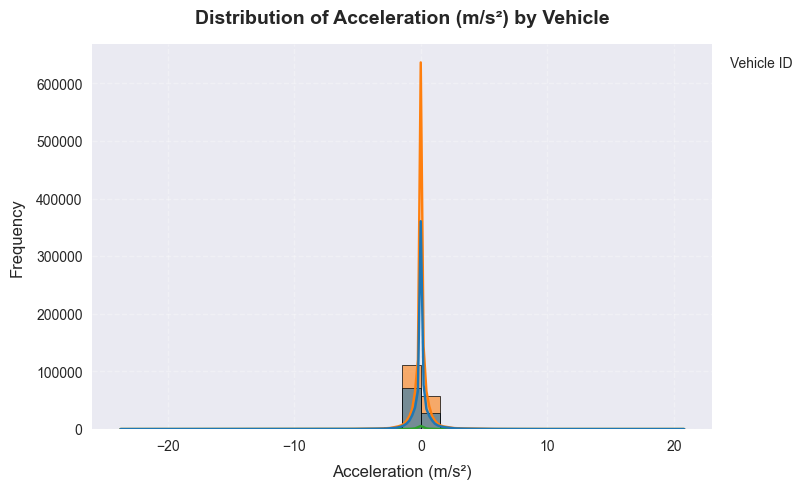

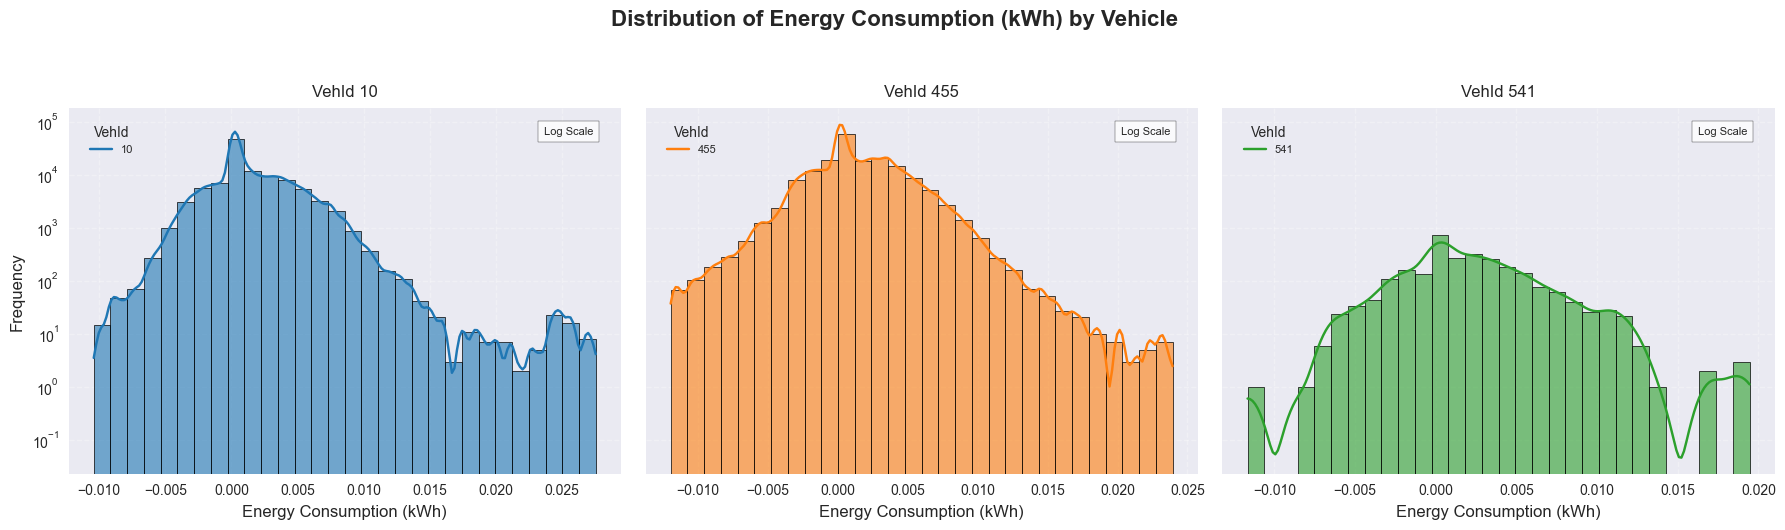

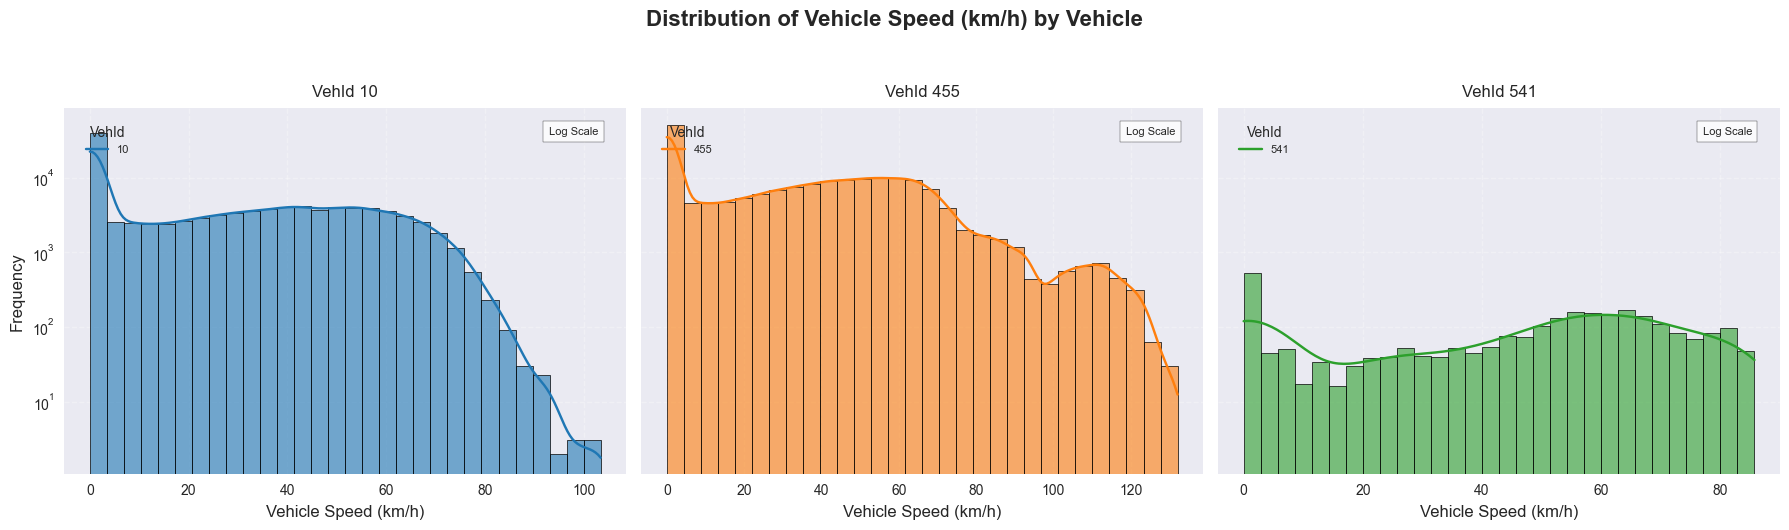

C:\Users\mredh\AppData\Local\Temp\ipykernel_14044\4014534912.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vehicle ID', loc='best', bbox_to_anchor=(1.15, 1), ncol=1)


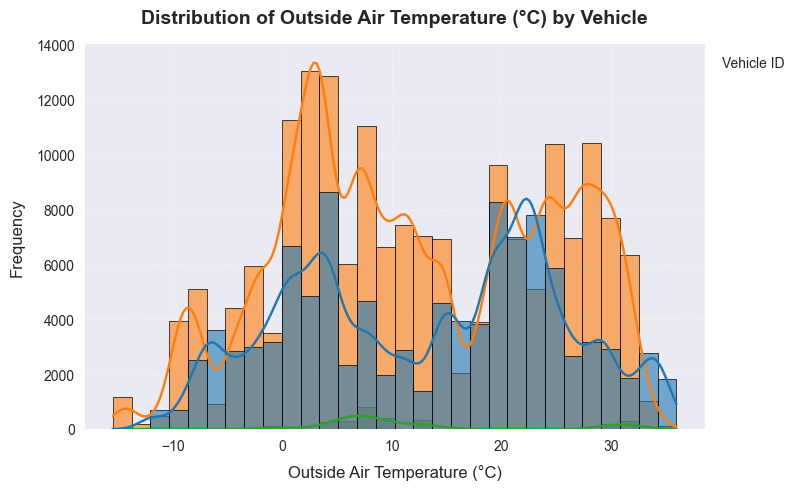

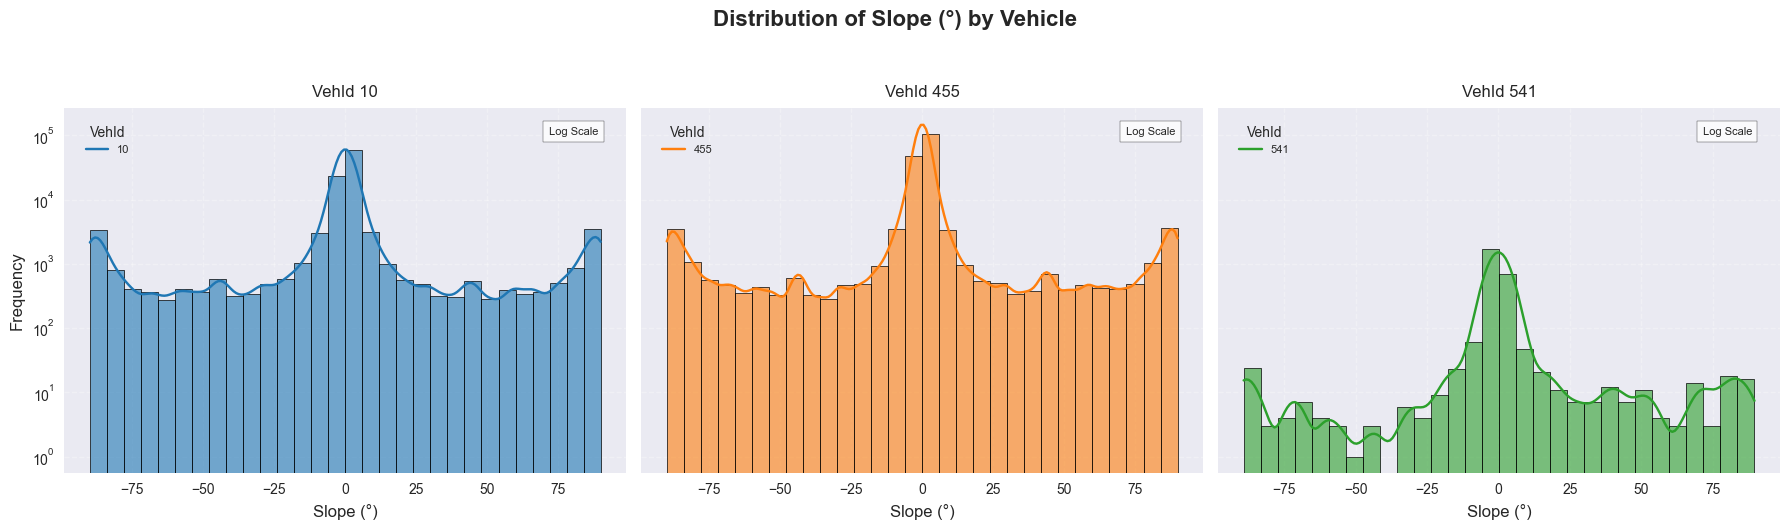

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

# Step 1: Set up the plotting environment
plt.style.use('seaborn-v0_8')  # Seaborn-like style
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.dpi': 100
})

# Step 2: Define custom color mapping for the three vehicles
vehicle_ids = [10, 455, 541]  # Your specified VehIds
color_map = {
    10: '#1f77b4',   # Blue
    455: '#ff7f0e',  # Orange
    541: '#2ca02c'   # Green
}

# Print color mapping for reference
print("Color Mapping for Vehicles:")
for veh_id, color in color_map.items():
    print(f"VehId {veh_id}: {color}")

# Step 3: Define key columns for distribution analysis with units
key_columns = {
    'Acceleration_ms2': 'Acceleration (m/s²)',
    'Energy_Consumption': 'Energy Consumption (kWh)',
    'Vehicle Speed[km/h]': 'Vehicle Speed (km/h)',
    'OAT[DegC]': 'Outside Air Temperature (°C)',
    'Slope_deg': 'Slope (°)',

}

# Step 4: Check number of unique vehicles
n_vehicles = downsampled_imputed['VehId'].nunique()
print(f"\nNumber of unique vehicles: {n_vehicles}")
if n_vehicles > len(color_map):
    print("Warning: More vehicles than colors defined. Some colors may repeat.")

# Step 5: Individual Plots with Enhanced Visualizations
print("\nIndividual Distribution Plots with Enhanced Visuals:")
for col_key, col_label in key_columns.items():
    if col_key == 'Energy_Consumption' or col_key == 'Slope_deg' or col_key == 'Vehicle Speed[km/h]':
        # Grouped subplot for Energy_Consumption for each vehicle
        fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='white', sharey=True)
        fig.suptitle(f'Distribution of {col_label} by Vehicle', fontsize=16, weight='bold', y=1.05)
        
        for idx, veh_id in enumerate(vehicle_ids):
            data_subset = downsampled_imputed[downsampled_imputed['VehId'] == veh_id]
            ax = axes[idx]
            hist = sns.histplot(
                data=data_subset, x=col_key, kde=True, bins=30, color=color_map[veh_id],
                edgecolor='black', linewidth=0.5, alpha=0.6, ax=ax
            )
            
            ax.set_title(f'VehId {veh_id}', pad=8, fontsize=12)
            ax.set_xlabel(col_label, labelpad=5)
            ax.set_ylabel('Frequency' if idx == 0 else '', labelpad=5)
            ax.grid(True, linestyle='--', alpha=0.3)
            ax.set_yscale('log')
            ax.text(0.95, 0.95, 'Log Scale', transform=ax.transAxes,
                    fontsize=8, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
            
            # Add legend with color key
            ax.legend(title='VehId', labels=[f'{veh_id}'], loc='upper left',
                      bbox_to_anchor=(0.02, 0.98), framealpha=0.8, fontsize=8)
            
            cursor = mplcursors.cursor(hist, hover=True)
            cursor.connect("add", lambda sel: sel.annotation.set_text(f'Value: {sel.target[0]:.2f}'))
        
        plt.tight_layout()
        safe_col_key = col_key.replace('[', '_').replace(']', '_').replace('/', '_').replace(' ', '_')
        plt.savefig(f'distribution_{safe_col_key}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    else:
        # Combined plots for other variables
        plt.figure(figsize=(8, 5), facecolor='white')
        hist = sns.histplot(
            data=downsampled_imputed, x=col_key, kde=True, bins=30, hue='VehId',
            hue_order=vehicle_ids, palette=color_map, edgecolor='black', linewidth=0.5, alpha=0.6
        )
        
        plt.title(f'Distribution of {col_label} by Vehicle', pad=15, weight='bold')
        plt.xlabel(col_label, labelpad=8)
        plt.ylabel('Frequency', labelpad=8)
        plt.grid(True, linestyle='--', alpha=0.3)
        
        if col_key in ['Energy_Consumption']:
            plt.yscale('log')
            plt.ylabel('Frequency (Log Scale)', labelpad=8)
            plt.text(0.95, 0.95, 'Log Scale', transform=plt.gca().transAxes,
                     fontsize=8, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))
        
        plt.legend(title='Vehicle ID', loc='best', bbox_to_anchor=(1.15, 1), ncol=1)
        
        cursor = mplcursors.cursor(hist, hover=True)
        cursor.connect("add", lambda sel: sel.annotation.set_text(f'Value: {sel.target[0]:.2f}'))
        
        safe_col_key = col_key.replace('[', '_').replace(']', '_').replace('/', '_').replace(' ', '_')
        plt.savefig(f'distribution_{safe_col_key}.png', dpi=300, bbox_inches='tight')
        plt.show()



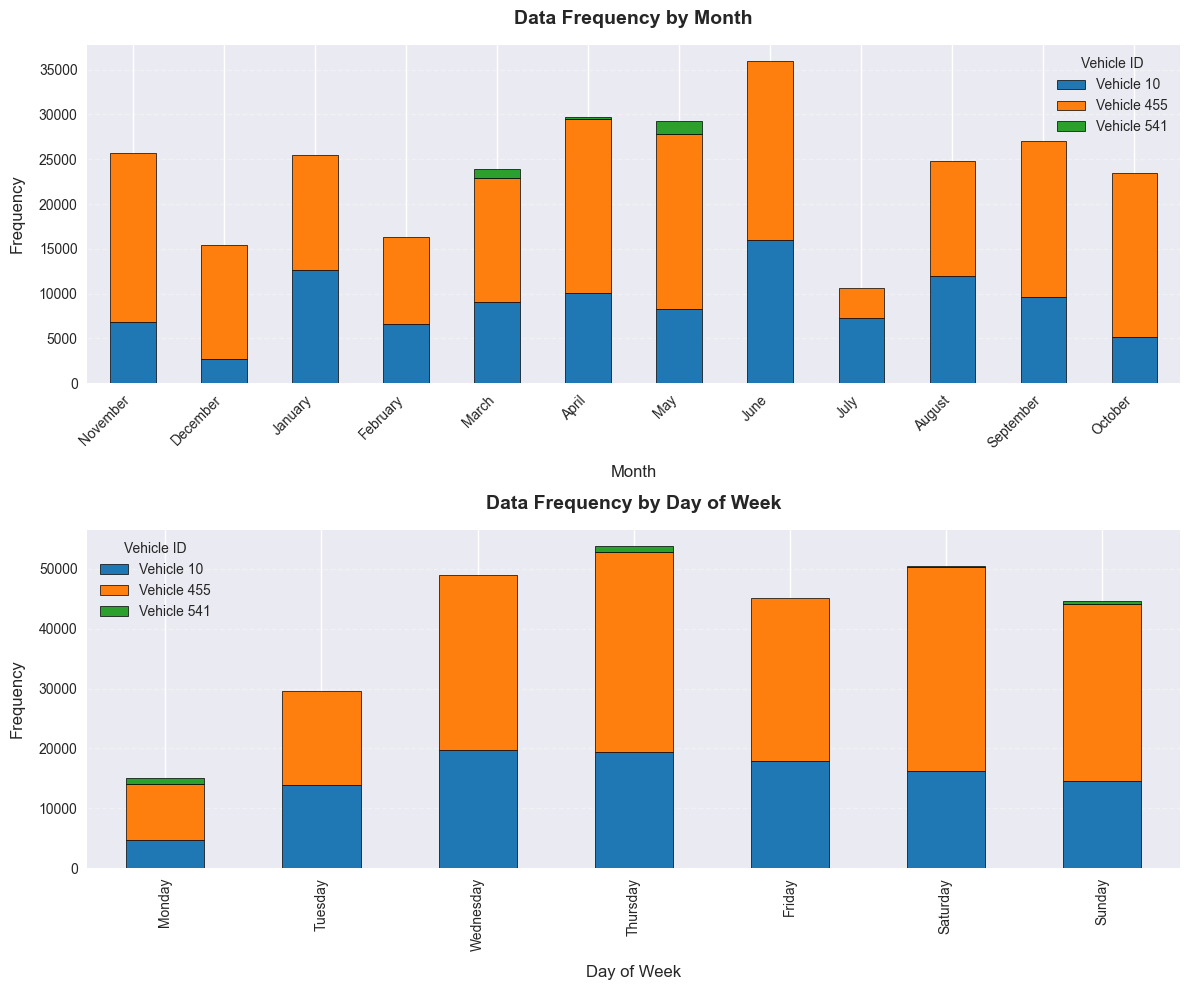

In [44]:
import matplotlib.pyplot as plt

# Extract month and day of week from the datetime column
downsampled_imputed['month'] = downsampled_imputed['Datetime'].dt.month
downsampled_imputed['day_of_week'] = downsampled_imputed['Datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
downsampled_imputed['month_name'] = downsampled_imputed['Datetime'].dt.month_name()
downsampled_imputed['day_name'] = downsampled_imputed['Datetime'].dt.day_name()

# Set up the plotting environment
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.dpi': 100
})

# Define color mapping for the three vehicles
vehicle_ids = [10, 455, 541]
color_map = {
    10: '#1f77b4',   # Blue
    455: '#ff7f0e',  # Orange
    541: '#2ca02c'   # Green
}

# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), facecolor='white')

# Plot 1: Frequency by Month
month_counts = downsampled_imputed.groupby(['month_name', 'VehId']).size().unstack()
# Reorder the months chronologically
month_order = ['November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
month_counts = month_counts.reindex(month_order)

month_counts.plot(kind='bar', stacked=True, ax=axes[0], color=[color_map[vid] for vid in vehicle_ids], 
                  edgecolor='black', linewidth=0.5)
axes[0].set_title('Data Frequency by Month', pad=15, fontweight='bold')
axes[0].set_xlabel('Month', labelpad=10)
axes[0].set_ylabel('Frequency', labelpad=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
axes[0].legend(title='Vehicle ID', labels=[f'Vehicle {vid}' for vid in vehicle_ids])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Frequency by Day of Week
day_counts = downsampled_imputed.groupby(['day_name', 'VehId']).size().unstack()
# Reorder the days of week starting with Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)

day_counts.plot(kind='bar', stacked=True, ax=axes[1], color=[color_map[vid] for vid in vehicle_ids], 
                edgecolor='black', linewidth=0.5)
axes[1].set_title('Data Frequency by Day of Week', pad=15, fontweight='bold')
axes[1].set_xlabel('Day of Week', labelpad=10)
axes[1].set_ylabel('Frequency', labelpad=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].legend(title='Vehicle ID', labels=[f'Vehicle {vid}' for vid in vehicle_ids])

plt.tight_layout()
plt.savefig('time_frequency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



In [53]:
# Group by VehId and calculate the dimensions (number of rows and columns) for each vehicle
vehicle_dimensions = downsampled_imputed.groupby('VehId').apply(lambda df: (df.shape[0], df.shape[1]))

# Convert the result to a DataFrame for better readability
vehicle_dimensions_df = vehicle_dimensions.reset_index(name='Dimensions')
vehicle_dimensions_df.columns = ['VehId', 'Rows_Columns']

# Display the dimensions of each vehicle
vehicle_dimensions_df

C:\Users\mredh\AppData\Local\Temp\ipykernel_14044\391291337.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vehicle_dimensions = downsampled_imputed.groupby('VehId').apply(lambda df: (df.shape[0], df.shape[1]))


,VehId,Rows_Columns
0,10.0,"(106487, 34)"
1,455.0,"(178536, 34)"
2,541.0,"(2733, 34)"


In [45]:
# Split the data by VehId and save as separate CSV files
for veh_id in [10, 455, 541]:
    # Filter data for the current vehicle ID
    vehicle_df = downsampled_imputed[downsampled_imputed['VehId'] == veh_id]
    
    # Define the output file path
    output_path = f'vehicle_{veh_id}_data.csv'
    
    # Save to CSV
    vehicle_df.to_csv(output_path, index=False)
    
    # Print confirmation with file size info
    file_size_mb = os.path.getsize(output_path) / (1024 * 1024)  # Convert bytes to MB
    print(f"Vehicle {veh_id} data saved to {output_path} ({file_size_mb:.2f} MB, {len(vehicle_df)} rows)")

Vehicle 10 data saved to vehicle_10_data.csv (40.31 MB, 106487 rows)
Vehicle 455 data saved to vehicle_455_data.csv (69.29 MB, 178536 rows)
Vehicle 541 data saved to vehicle_541_data.csv (1.07 MB, 2733 rows)


# Exploring California Nissan Leaf Dataset

## Overview
In this section, we will analyze a different electric vehicle dataset - a Nissan Leaf operating in California. This complements our previous analysis by providing:

- Data from a different geographical region (California)
- Focus on a single vehicle model (Nissan Leaf)


# Reading Data

In [ ]:
import os
import glob


# Define the path to the directory containing the CSV files
directory_path = r'C:\Users\mredh\Documents\Projet FEVC\Data 2'  

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Check if any files were found
if not csv_files:
    print(f"No CSV files found in directory: {directory_path}")
else:
    print(f"Found {len(csv_files)} CSV files in directory: {directory_path}")

# List to store the dataframes
dfs = []

# Loop through all CSV files in the directory
for file_path in csv_files:
    print(f"Reading file: {file_path}")
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Append the dataframe to the list
    dfs.append(df)

# Check if any dataframes were created
if not dfs:
    print("No data was read from the CSV files.")
else:
    # Concatenate all dataframes into a single dataframe
    merged_df = pd.concat(dfs, ignore_index=True)

Found 80 CSV files in directory: C:\Users\mredh\Documents\Projet FEVC\Data 2
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130423-094512GPSXX053 La Sierra and Magnolia_processed_Sync_MM.csv
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130425-101515GPSXX055 La Sierra and Magnolia-processed_Sync_MM.csv
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130430-100828GPSXX058 La Sierra and Magnolia-processed_Sync_MM.csv
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130509-102207GPSXX064 La Sierra and Magnolia-processed_Sync_MM.csv
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130514-102739GPSXX066 La Sierra and Magnolia-processed_Sync_MM.csv
Reading file: C:\Users\mredh\Documents\Projet FEVC\Data 2\Organized_MM_DataMonitor_20130516-102906GPSXX067 La Sierra and Magnolia-processed_Sync_MM.csv
Reading fil

In [47]:
merged_df.dtypes


YEAR                                float64
MONTH                               float64
DAY                                 float64
HOUR                                float64
MINUTE                              float64
SECOND                              float64
LATITUDE                            float64
LONGITUDE                           float64
ALTITUDE                            float64
HEADING                             float64
SPEED (mph)[GPS]                    float64
SAT                                 float64
PDOP                                float64
HDOP                                float64
VDOP                                float64
FIX                                 float64
VEHID                               float64
TRIPID                              float64
System Monitor                      float64
Eco Indicator                       float64
Power Consumption (A/C) (kW)        float64
Power Consumption (AUXS) (kW)       float64
Ambient Temperature (degree C)  

In [48]:
# Calculate the percentage of missing values for each column in the merged dataframe
missing_percentage_merged = merged_df.isnull().mean() * 100

# Display the percentage of missing values
missing_percentage_merged

YEAR                                0.0
MONTH                               0.0
DAY                                 0.0
HOUR                                0.0
MINUTE                              0.0
SECOND                              0.0
LATITUDE                            0.0
LONGITUDE                           0.0
ALTITUDE                            0.0
HEADING                             0.0
SPEED (mph)[GPS]                    0.0
SAT                                 0.0
PDOP                                0.0
HDOP                                0.0
VDOP                                0.0
FIX                                 0.0
VEHID                               0.0
TRIPID                              0.0
System Monitor                      0.0
Eco Indicator                       0.0
Power Consumption (A/C) (kW)        0.0
Power Consumption (AUXS) (kW)       0.0
Ambient Temperature (degree C)      0.0
HV Battery Level (%)                0.0
Battery Electric Current (A)        0.0


In [50]:
import pandas as pd
import numpy as np

# Function to convert road grade to float
def convert_road_grade(value):
    try:
        if pd.notnull(value) and value != 'NaN':
            return float(value)
        return np.nan
    except (ValueError, TypeError):
        return np.nan

# Extract slope data from road grade column
merged_df['slope_percent'] = merged_df['road grade'].apply(convert_road_grade)

# Create timestamp column for time calculations
merged_df['timestamp'] = pd.to_datetime(
    merged_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']]
)

# Sort data by trip and timestamp
merged_df = merged_df.sort_values(['TRIPID', 'timestamp'])

# Calculate time differences between consecutive records within each trip (in seconds)
merged_df['time_diff'] = merged_df.groupby('TRIPID')['timestamp'].diff().dt.total_seconds()

# Convert speed to m/s (from km/h)
merged_df['speed_ms'] = merged_df['Speed Meter (km/h) [Consult III]'] / 3.6

# Calculate speed differences between consecutive records within each trip
merged_df['speed_diff'] = merged_df.groupby('TRIPID')['speed_ms'].diff()

# Calculate acceleration (m/s²)
merged_df['acceleration_ms2'] = np.where(
    merged_df['time_diff'] > 0,  # Only calculate where time difference is positive
    merged_df['speed_diff'] / merged_df['time_diff'],
    np.nan
)

# Create a clean dataframe with just slope and acceleration
slope_accel_df = merged_df[['TRIPID', 'timestamp', 'slope_percent', 'acceleration_ms2']]

# Convert slope percentage to degrees
merged_df['slope_deg'] = np.arctan(merged_df['slope_percent'] / 100) * (180 / np.pi)

# Create a clean dataframe with slope percentages, degrees, and acceleration
slope_accel_df = merged_df[['TRIPID', 'timestamp', 'slope_percent', 'slope_deg', 'acceleration_ms2']]






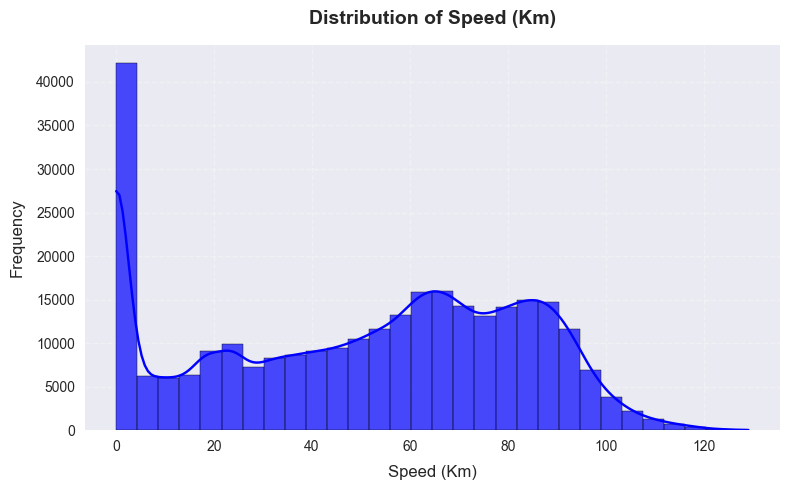

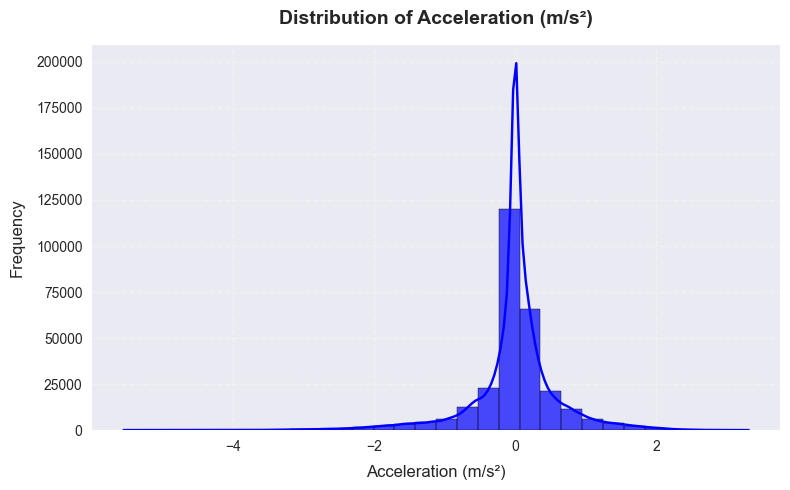

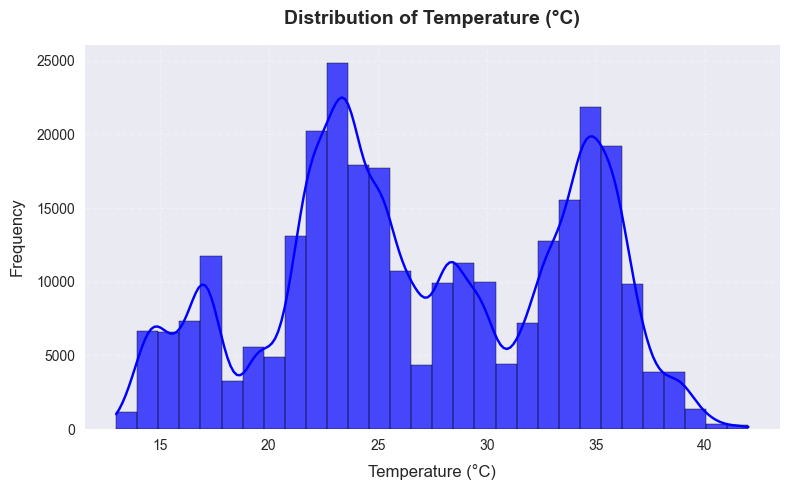

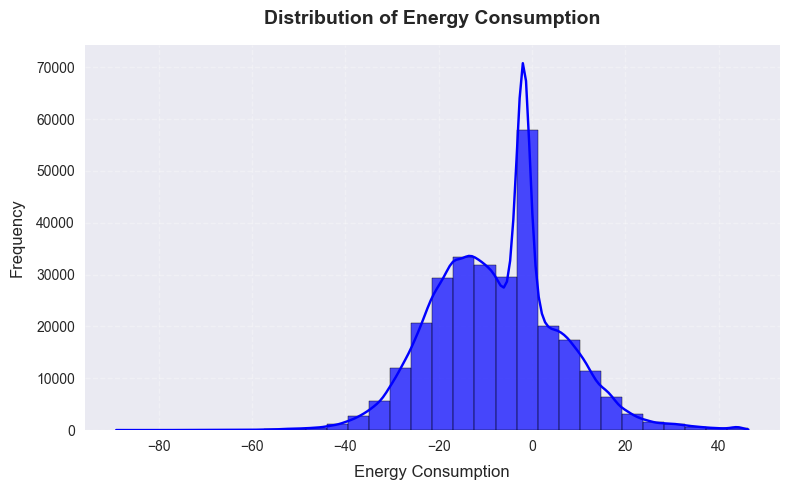

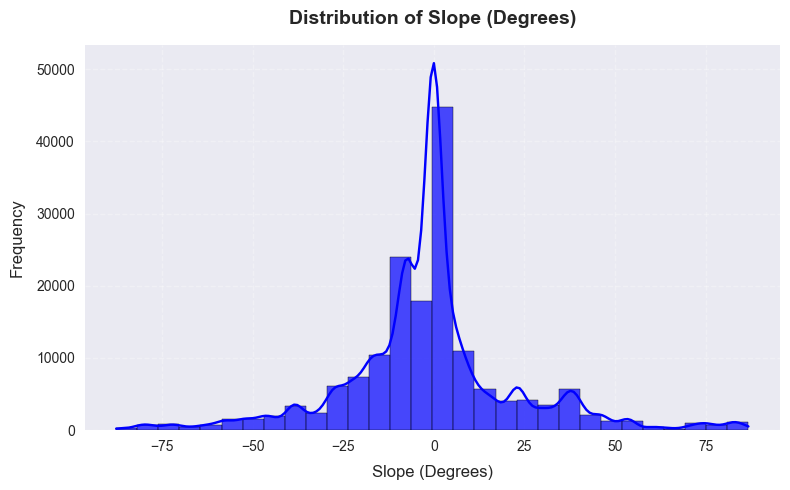

C:\Users\mredh\AppData\Local\Temp\ipykernel_14044\542612096.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='month_name', order=merged_df['month_name'].unique(), palette='viridis')


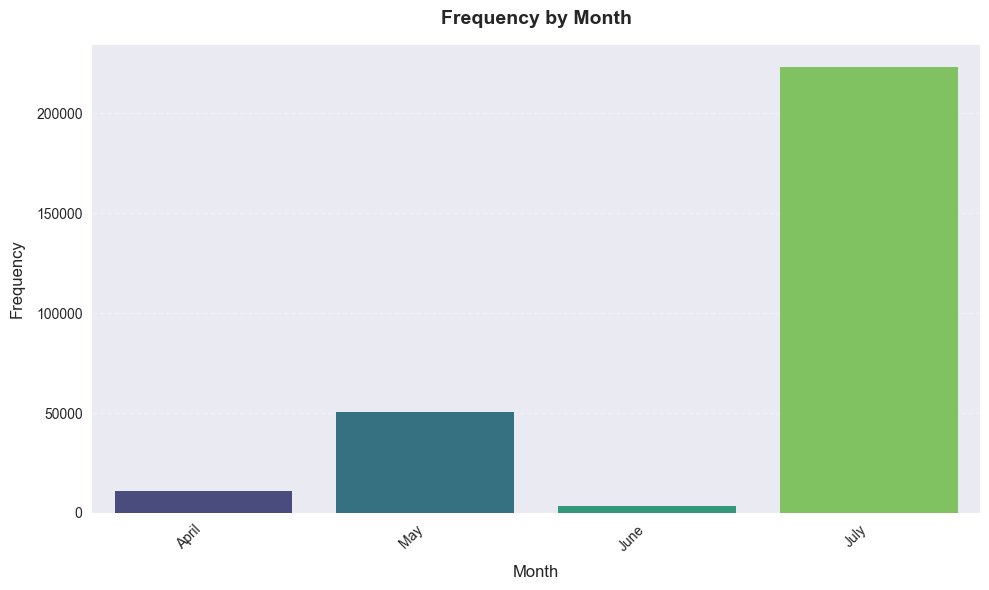

C:\Users\mredh\AppData\Local\Temp\ipykernel_14044\542612096.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='day_name', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


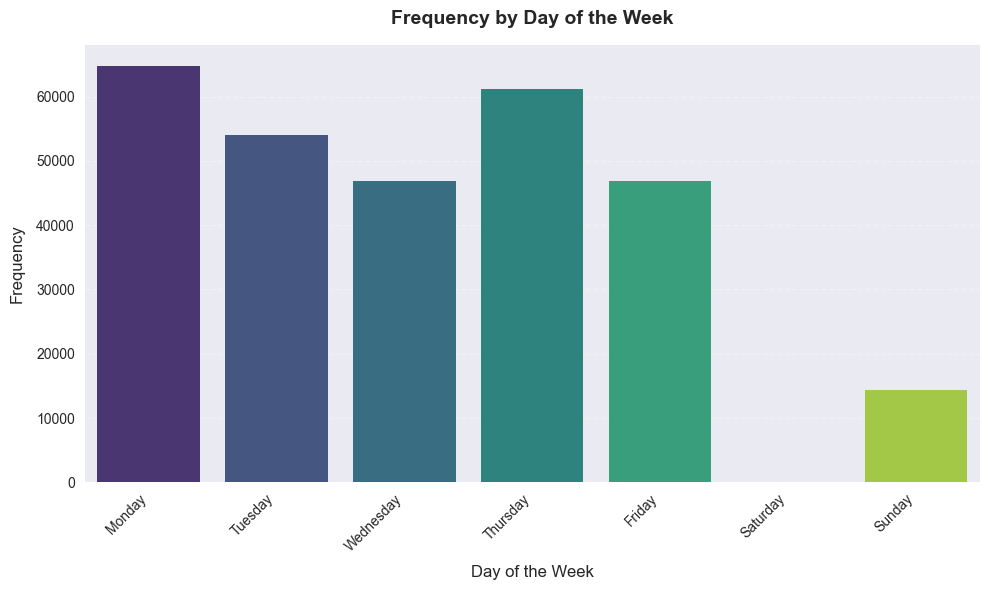

In [51]:
# Extract month and day of the week from the timestamp
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['day_of_week'] = merged_df['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday
merged_df['month_name'] = merged_df['timestamp'].dt.month_name()
merged_df['day_name'] = merged_df['timestamp'].dt.day_name()

# Set up the plotting environment
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.dpi': 100
})

# Define the variables to plot
variables = {
    'Speed Meter (km/h) [Consult III]': 'Speed (Km)',
    'acceleration_ms2': 'Acceleration (m/s²)',
    'Ambient Temperature (degree C)': 'Temperature (°C)',
    'Energy consumption': 'Energy Consumption',
    'slope_deg': 'Slope (Degrees)'
}

# Plot distributions for each variable
for var, label in variables.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged_df, x=var, kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {label}', pad=15, weight='bold')
    plt.xlabel(label, labelpad=8)
    plt.ylabel('Frequency', labelpad=8)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot frequency by month
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='month_name', order=merged_df['month_name'].unique(), palette='viridis')
plt.title('Frequency by Month', pad=15, weight='bold')
plt.xlabel('Month', labelpad=8)
plt.ylabel('Frequency', labelpad=8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot frequency by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='day_name', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Frequency by Day of the Week', pad=15, weight='bold')
plt.xlabel('Day of the Week', labelpad=8)
plt.ylabel('Frequency', labelpad=8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
# Get the dimensions of the merged dataframe
merged_df_dimensions = merged_df.shape

# Display the dimensions
print(f"The dimensions of merged_df are: {merged_df_dimensions}")

The dimensions of merged_df are: (287962, 47)


In [ ]:
# Define the path to save the merged dataframe as a CSV file
vehicle_4_csv_path = 'vehicle_4.csv'

# Save the merged dataframe to a CSV file  
merged_df.to_csv(vehicle_4_csv_path, index=False)

# Confirm the file has been saved
print(f"Merged data has been saved to {vehicle_4_csv_path}")

Merged data has been saved to vehicle_4.csv
